# Homework #1   Due date: 27 October 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression




In [ ]:
data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [ ]:
lr = LinearRegression(fit_intercept=True)

X=housing_df[['LSTAT']]
y=housing_df[['target']]

lr.fit(X,y)
print(lr.score(X,y))

0.5441462975864797


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


equation of the fitting line: y = -0.9500493537579906 x  + 34.5538408793831



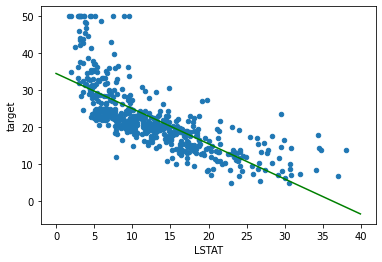

In [ ]:
housing_df.plot.scatter(x='LSTAT', y='target')

f = lambda x: lr.coef_[0] * x + lr.intercept_
print("equation of the fitting line: y = "+str(lr.coef_[0][0])+ " x  +", lr.intercept_[0])
print()
steps = list(np.arange(0,40,.1))
pyplot.plot(steps, list(map(f, steps)),color='green')

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [ ]:
data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

def mse(X, y):
  lr = LinearRegression(fit_intercept=True)
  lr.fit(X,y)
  total = 0

  for i in range(len(X.index)):
    
    pr = lr.predict([X.iloc[i]])
    
    error = (pr[0][0] - y.iloc[i][0])**2
    
    total += error
  return total/(len(y.index))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X=housing_df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df[['target']]

print("MSE :", mse(X,y))

MSE : 21.894831181729224


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [ ]:
from sklearn.model_selection import train_test_split

data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

X=housing_df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

lr = LinearRegression()

lr.fit(X_train,y_train)

sc = lr.score(X_test, y_test)

print("score on the test data :",sc)

print("mean squared error :",mse(X_train, y_train))





score on the test data : 0.728345870534735
mean squared error : 23.194631535066115


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.